<a href="https://colab.research.google.com/github/dobrotvorn/DataCon23/blob/main/Mini_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

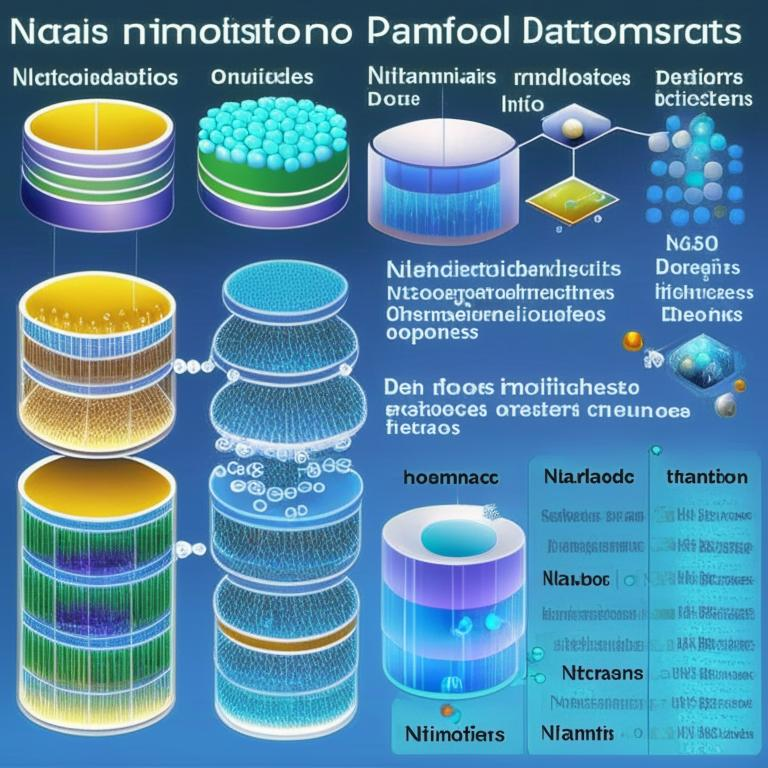

## Описание задания


Перед вами данные исследования токсичности наноматериалов.
Это краткое описание баз данных с информациями о наноматериалах, их составе, физико-химических характеристиках, условиях проведения исследований нанотоксичности и данные по выживаемости клеток.

Описание:

1. Material type, nanoparticle - химическая формула.
2. Elements - некислородный элемент входящий в состав (причина - большинство материалов оксиды и металлы).
3. Electronegativity - электроотрицательность по Полингу.
4. Ionic radius - ионный радиус элемента (исходя из степени окисления; если смесь степеней - среднее значение).
5. Core size - размер кристаллита (составной элемент наночастиц, который в принципе можно назвать элементарной ячейкой наночастиц).
6. Hydro size, diameter - гидродинамический диаметр частиц - диаметр частиц в растворе.
7. Surface charge, zeta potential - дзета-потенциал или заряд поверхности.
8. Surface area - площадь поверхности материала (измерено сорбцией азота).
9. Cell type, cells - два типа клеточных линий.
10. Exposure dose, concentration, dose - финальная концентрация частиц в растворе с клетками.
11. Number of atoms - количество атомов.
12. Molecular weight - молекулярный вес.
13. Topological polar surface area - дескриптор, рассчитываемый из формулы.
14. a, b, c, alpha, beta, gamma - параметры кристаллической решетки.
15. Density - плотность материала.
16. Viability - выживаемость клеток.
17. Type - тип (органика/неорганика).
18. Coat - поверхностная модификация.
19. Cell line / primary cells - тип клеток (клеточная линия или отобрано непосредственно из организма).
20. Human / animal - человек/животное.
21. Animal - животное.
22. Cell morphology - тип ткани клеток.
23. Cell age - эмбриональные или зрелые.
24. Cell organ / tissue - орган.
25. Exposure time, time - время инкубации материала с клетками.
26. Test - тип теста для оценки токсичности материалов.
27. Test indicator - использованный реагент.
28. Biochemical metrics - показатели для оценки жизнеспособности.
29. Interference test - проверка на влияние других реагентов на результаты.
30. Colloidal stability - стабильность коллоидной системы.
31. Positive control - наличие положительного контроля в тесте (тест, демонстрирующий нормальный рост клеток).

## Загрузка данных и библиотек

###Импортируем и скачиваем библиотеки

In [40]:
# !pip install gdown
!pip install fancyimpute
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer
from IPython.display import display, HTML
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from fancyimpute import KNN

In [201]:

# тут захардкодим статичные переменные
global ordinal_encoder
global text_columns
global path2firstDb
global path2secondDb
path2firstDb = '/content/firstDb.csv' if 'google.colab' in sys.modules else 'firstDb.csv'
path2secondDb = '/content/secondDb.csv' if 'google.colab' in sys.modules else 'secondDb.csv'

### Скачиваем данные

In [202]:
url1 = 'https://drive.google.com/uc?id=1-3ErIGqYlM-4gC39Mzv1-wlFVGhN80UH'
url2 = 'https://drive.google.com/uc?id=1-EsWBtWMMc-zO1gxxj7JcJV7en5uwheU'
output1 = 'firstDb.csv'
output2 = 'secondDb.csv'
gdown.download(url1, output1, quiet=False)
gdown.download(url2, output2, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-3ErIGqYlM-4gC39Mzv1-wlFVGhN80UH
To: /content/firstDb.csv
100%|██████████| 61.5k/61.5k [00:00<00:00, 26.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-EsWBtWMMc-zO1gxxj7JcJV7en5uwheU
To: /content/secondDb.csv
100%|██████████| 104k/104k [00:00<00:00, 10.1MB/s]


'secondDb.csv'

## Обработка данных

In [203]:
fdb = pd.read_csv(path2firstDb)
# (fdb['Nanoparticle'] == 'CuO') and ('Diameter (nm)' == )
print(fdb.columns)
fdb.head()

Index(['Unnamed: 0', 'Nanoparticle', 'Type: Organic (O)/inorganic (I)', 'coat',
       'Diameter (nm)', 'Concentration μM', 'Zeta potential (mV)', 'Cells',
       'Cell line (L)/primary cells (P)', 'Human(H)/Animal(A) cells',
       'Cell age: embryonic (E), Adult (A)', 'Exposure time (h)',
       '% Cell viability'],
      dtype='object')


,Unnamed: 0,Nanoparticle,Type: Organic (O)/inorganic (I),coat,Diameter (nm),Concentration μM,Zeta potential (mV),Cells,Cell line (L)/primary cells (P),Human(H)/Animal(A) cells,"Cell age: embryonic (E), Adult (A)",Exposure time (h),% Cell viability
0,9,CuO,I,NaN,52.51,0.000035,-39.67,A549,L,H,A,24,74.587160
1,10,CuO,I,NaN,52.51,0.000087,-39.67,A549,L,H,A,24,66.055046
2,11,CuO,I,NaN,52.51,0.000174,-39.67,A549,L,H,A,24,48.165140
3,12,CuO,I,NaN,52.51,0.000035,-39.67,A549,L,H,A,24,84.713870
4,13,CuO,I,NaN,52.51,0.000087,-39.67,A549,L,H,A,24,68.672810


In [204]:
sdb = pd.read_csv(path2secondDb)
print(sdb.columns)
# print(sdb['Surface_Charge'].DOI.unique())

sdb.groupby('Surface_Charge')['No'].count()
sdb.head(8)


Index(['Unnamed: 0', 'No', 'Year', 'Material', 'Type', 'Coat',
       'Surface_Charge', 'Diameter (nm)', 'Cell_Type', 'Human_Animal',
       'Cell_Age', 'Cell Line_Primary Cell', 'Time (hr)',
       'Concentration (ug/ml)', 'Cell_Viability (%)', 'DOI'],
      dtype='object')


,Unnamed: 0,No,Year,Material,Type,Coat,Surface_Charge,Diameter (nm),Cell_Type,Human_Animal,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Cell_Viability (%),DOI
0,92,93,2014,IronOxide,I,Dextran,unknown,18.0,VERO,A,Adult,L,24,100.0,102.00,10.1002/jbm.b.33068
1,93,94,2014,IronOxide,I,Dextran,unknown,18.0,VERO,A,Adult,L,24,200.0,105.08,10.1002/jbm.b.33068
2,94,95,2014,IronOxide,I,Dextran,unknown,18.0,VERO,A,Adult,L,24,300.0,100.00,10.1002/jbm.b.33068
3,95,96,2014,IronOxide,I,Dextran,unknown,18.0,VERO,A,Adult,L,24,400.0,100.00,10.1002/jbm.b.33068
4,96,97,2014,IronOxide,I,Dextran,unknown,18.0,VERO,A,Adult,L,24,500.0,80.00,10.1002/jbm.b.33068
5,97,98,2014,IronOxide,I,Dextran,unknown,18.0,MDCK,A,Adult,L,24,100.0,101.97,10.1002/jbm.b.33068
6,98,99,2014,IronOxide,I,Dextran,unknown,18.0,MDCK,A,Adult,L,24,200.0,115.09,10.1002/jbm.b.33068
7,99,100,2014,IronOxide,I,Dextran,unknown,18.0,MDCK,A,Adult,L,24,300.0,115.09,10.1002/jbm.b.33068


In [205]:
sdb[sdb.DOI=='10.1007/s11051-018-4406-0']

,Unnamed: 0,No,Year,Material,Type,Coat,Surface_Charge,Diameter (nm),Cell_Type,Human_Animal,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Cell_Viability (%),DOI
668,2231,2232,2018,Au,I,Citrate,Negative,14.5,PBMC,H,Adult,P,24,15.0,71.030,10.1007/s11051-018-4406-0
669,2232,2233,2018,Au,I,CyA,Positive,6.5,PBMC,H,Adult,P,24,15.0,75.567,10.1007/s11051-018-4406-0
670,2233,2234,2018,Au,I,GSH,Negative,3.8,PBMC,H,Adult,P,24,15.0,72.251,10.1007/s11051-018-4406-0
671,2234,2235,2018,Au,I,Citrate,Negative,7.0,PBMC,H,Adult,P,24,15.0,83.072,10.1007/s11051-018-4406-0
672,2235,2236,2018,Au,I,Citrate,Negative,14.5,PBMC,H,Adult,P,24,1.5,87.053,10.1007/s11051-018-4406-0
673,2236,2237,2018,Au,I,CyA,Positive,6.5,PBMC,H,Adult,P,24,1.5,99.319,10.1007/s11051-018-4406-0
674,2237,2238,2018,Au,I,GSH,Negative,3.8,PBMC,H,Adult,P,24,1.5,102.210,10.1007/s11051-018-4406-0
675,2238,2239,2018,Au,I,Citrate,Negative,7.0,PBMC,H,Adult,P,24,1.5,85.349,10.1007/s11051-018-4406-0
676,2239,2240,2018,Au,I,Citrate,Negative,14.5,Jurkat,H,Adult,L,24,15.0,93.309,10.1007/s11051-018-4406-0
677,2240,2241,2018,Au,I,CyA,Positive,6.5,Jurkat,H,Adult,L,24,15.0,83.457,10.1007/s11051-018-4406-0


In [206]:
sdb[sdb.DOI=='10.1002/smll.201502346']

,Unnamed: 0,No,Year,Material,Type,Coat,Surface_Charge,Diameter (nm),Cell_Type,Human_Animal,Cell_Age,Cell Line_Primary Cell,Time (hr),Concentration (ug/ml),Cell_Viability (%),DOI
411,1486,1487,2015,Au,I,MSA,Negative,1.5,WA09,H,Embryonic,L,24,10.0,15.17400,10.1002/smll.201502346
412,1487,1488,2015,Au,I,MSA,Negative,4.2,WA09,H,Embryonic,L,24,10.0,98.17200,10.1002/smll.201502346
413,1488,1489,2015,Au,I,Citrate,Negative,13.6,WA09,H,Embryonic,L,24,10.0,103.47000,10.1002/smll.201502346
414,1489,1490,2015,Au,I,MSA,Negative,1.5,WA09,H,Embryonic,L,24,10.0,14.25900,10.1002/smll.201502346
415,1490,1491,2015,Au,I,MSA,Negative,4.2,WA09,H,Embryonic,L,24,10.0,90.49400,10.1002/smll.201502346
416,1491,1492,2015,Au,I,Citrate,Negative,13.6,WA09,H,Embryonic,L,24,10.0,79.08700,10.1002/smll.201502346
417,1492,1493,2015,Au,I,MSA,Negative,1.5,WA09,H,Embryonic,L,24,0.001,90.57300,10.1002/smll.201502346
418,1493,1494,2015,Au,I,MSA,Negative,1.5,WA09,H,Embryonic,L,24,0.01,87.61600,10.1002/smll.201502346
419,1494,1495,2015,Au,I,MSA,Negative,1.5,WA09,H,Embryonic,L,24,0.1,75.97000,10.1002/smll.201502346
420,1495,1496,2015,Au,I,MSA,Negative,1.5,WA09,H,Embryonic,L,24,1.0,56.56200,10.1002/smll.201502346


In [207]:
fdb['coat'] = fdb['coat'].fillna('NotModified')
sdb['Coat'] = sdb['Coat'].fillna('NotModified')
none_mapper = {'unknown': None, '-': None, 'None': None}
sdb.replace(none_mapper, inplace=True)
fdb.replace(none_mapper, inplace=True)


Изменим данные из 1й базы данных так, чтобы их можно было присоединить к данным из второй базы данных. Из второй базы данных удалим лишние столбцы (год, номер, DOI)

In [208]:
fdb = fdb.rename(columns=
                 {'Nanoparticle': 'Material',
                'Zeta potential (mV)': 'Surface_Charge',
                'Cells': 'Cell_Type',
                'Cell line (L)/primary cells (P)': 'Cell Line_Primary Cell',
                'Human(H)/Animal(A) cells': 'Human_Animal',
                'Exposure time (h)': 'Time (hr)',
                'Type: Organic (O)/inorganic (I)': 'Type',
                'coat': 'Coat',
                '% Cell viability': 'Cell_Viability (%)'}
)
hardcode_mol_mass = {'CuO' : 79.53, 'Iron oxide': 215.49,'IronOxide':215.49,'IronOide':215.49 ,'Au':196.96, 'Cu2O':143.07}
hardcode_age = {'E' : 'Embryonic', 'A' : 'Adult', 'F': 'Fetus'}

fdb['Concentration (ug/ml)']= fdb[['Concentration μM', 'Material' ]].apply(lambda x:  hardcode_mol_mass[x['Material']] * float(x['Concentration μM']/ 1000 if x['Material'] and x['Concentration μM']  else None), axis=1)
fdb['Cell_Age'] = fdb['Cell age: embryonic (E), Adult (A)'].apply(lambda x: hardcode_age[x] if x else None)
# Переведем во float то, что не перевелось во float из-за '-'
fdb['Concentration (ug/ml)'] = fdb['Concentration (ug/ml)'].astype(float)
sdb['Concentration (ug/ml)'] = sdb['Concentration (ug/ml)'].astype(float)

fdb['Diameter (nm)'] = fdb['Diameter (nm)'].astype(float)
sdb['Diameter (nm)'] = sdb['Diameter (nm)'].astype(float)

fdb['Coat'] = fdb['Coat'].fillna('NotModified')
sdb['Coat'] = sdb['Coat'].fillna('NotModified')

fdb['Surface_Charge'] = fdb['Surface_Charge'].apply(lambda x: 'Positive' if float(x) > 0 else 'Negative' if float(x) < 0 else 'Neutral' if float(x) == 0 else None)

# Exposure dose, concentration, dose
# Cell_Age
# doi, no, year
fdb_new = fdb.drop(columns=['Concentration μM', 'Cell age: embryonic (E), Adult (A)'])
sdb_new = sdb.drop(columns=['No','Year', 'DOI'], axis=1)
fdb_new.head(2)

,Unnamed: 0,Material,Type,Coat,Diameter (nm),Surface_Charge,Cell_Type,Cell Line_Primary Cell,Human_Animal,Time (hr),Cell_Viability (%),Concentration (ug/ml),Cell_Age
0,9,CuO,I,NotModified,52.51,Negative,A549,L,H,24,74.587160,0.000003,Adult
1,10,CuO,I,NotModified,52.51,Negative,A549,L,H,24,66.055046,0.000007,Adult


In [209]:
fdb_new[fdb_new['Cell_Viability (%)'] == 100.75949]
# fdb_new['Surface_Charge'].unique()

,Unnamed: 0,Material,Type,Coat,Diameter (nm),Surface_Charge,Cell_Type,Cell Line_Primary Cell,Human_Animal,Time (hr),Cell_Viability (%),Concentration (ug/ml),Cell_Age
760,1959,Au,I,NotModified,20.0,None,HEK­293,L,H,48,100.75949,0.000197,Embryonic


In [210]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [211]:
# fdb = fdb.replace({'unknown': None, '-': None, 'None': None})
# sdb = sdb.replace({'unknown': None, '-': None, 'None': None})
# from sklearn.preprocessing import RobustScaler

# def replace_unknown(x):
#     none_mapper = {'unknown': None, '-': None, 'None': None}
#     return x.replace(none_mapper)

# def replace_charge(x):
#     return pd.DataFrame(np.where(x > 0, 'Positive', 'Negative'), index=x.index, columns=['pos_and_neg'])

# numerical_transformer = Pipeline(
#     steps=[
#         # ('imputer', KNNImputer(n_neighbors=4)),

#         ('imputer', KNN(k=3)),
#         # ('encoder', OneHotEncoder()),
#         # ('scaler', StandardScaler())
#     ]
# )

# ratio_transformer = Pipeline(
#     steps=[
#         # ('imputer', IterativeImputer(random_state=0)),
#         ('imputer', KNNImputer(n_neighbors=4)),
#         # ('encoder', OneHotEncoder()),
#         # ('scaler', RobustScaler())
#     ]
# )


# column_transformer_fdb = ColumnTransformer([
#     # ('replace unknown with none', FunctionTransformer(replace_unknown), fdb_new.columns),
#     ('reduce None numerical',numerical_transformer, fdb_new.select_dtypes(include='object').columns.tolist()),
#     ('reduce None ratio',ratio_transformer, fdb_new.select_dtypes(include=numerics).columns.tolist()),
#     ('Surface_Charge', FunctionTransformer(replace_charge), 'Surface_Charge')
# ]
# )
# column_transformer_sdb = ColumnTransformer([
#     # ('replace unknown with none', FunctionTransformer(replace_unknown), fdb_new.columns),
#     ('reduce None numerical',numerical_transformer, sdb_new.select_dtypes(include='object').columns.tolist()),
#     ('reduce None ratio',ratio_transformer, sdb_new.select_dtypes(include=numerics).columns.tolist()),
# ]
# )
# # column_transformer_fdb.set_output(transform='pandas')
# # column_transformer_sdb.set_output(transform='pandas')

# fdb_new_transformed = column_transformer_fdb.fit_transform(fdb)

# sdb_new_transformed = column_transformer_sdb.fit_transform(sdb)
# # print('Столбцы с None в первой бд', fdb.columns[fdb.isnull().any()])
# # print('Столбцы с None во второй бд', sdb.columns[sdb.isnull().any()])
# fdb_new_transformed.isnull().any()
# # FunctionTransformer

In [212]:
# fdb_new_transformed['reduce None numerical__Surface_Charge '] = fdb_new_transformed['Surface_Charge__pos_and_neg']
# fdb_new_transformed = fdb_new_transformed.drop('Surface_Charge__pos_and_neg', axis=1)
# fdb_new_transformed.head(3)

In [213]:
# sdb_new_transformed['reduce None numerical__Surface_Charge'].isnull().sum() ## как мы видим, во второй базе очень много null, проблему с ними не решили

Итак, мы слили все в один файл!

In [214]:
df = pd.concat([fdb_new, sdb_new], axis=0)
df.to_csv('ResultTable.csv')
df.isnull().any()

Unnamed: 0                False
Material                  False
Type                      False
Coat                      False
Diameter (nm)              True
Surface_Charge             True
Cell_Type                 False
Cell Line_Primary Cell    False
Human_Animal              False
Time (hr)                 False
Cell_Viability (%)        False
Concentration (ug/ml)      True
Cell_Age                  False
dtype: bool

In [215]:
df

,Unnamed: 0,Material,Type,Coat,Diameter (nm),Surface_Charge,Cell_Type,Cell Line_Primary Cell,Human_Animal,Time (hr),Cell_Viability (%),Concentration (ug/ml),Cell_Age
0,9,CuO,I,NotModified,52.51,Negative,A549,L,H,24,74.587160,0.000003,Adult
1,10,CuO,I,NotModified,52.51,Negative,A549,L,H,24,66.055046,0.000007,Adult
2,11,CuO,I,NotModified,52.51,Negative,A549,L,H,24,48.165140,0.000014,Adult
3,12,CuO,I,NotModified,52.51,Negative,A549,L,H,24,84.713870,0.000003,Adult
4,13,CuO,I,NotModified,52.51,Negative,A549,L,H,24,68.672810,0.000007,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,3811,Au,I,Citrate,4.70,Negative,RAW264.7,L,A,48,68.957000,100.000000,Adult
1060,3816,Au,I,Citrate,270.00,Negative,RAW264.7,L,A,48,93.893000,5.000000,Adult
1061,3817,Au,I,Citrate,270.00,Negative,RAW264.7,L,A,48,86.005000,10.000000,Adult
1062,3818,Au,I,Citrate,270.00,Negative,RAW264.7,L,A,48,79.644000,100.000000,Adult


In [216]:
# проверяем, какие стобцы нужны, как они называются
# проверяем на совместимость единиц измерения
# соединяем таблицы
# предобрабатываем числовые и нечисловые признаки
# отдельно прописываем, какие столбцы числовые, какие порядковые, а какие numerical

Посмотрим, сколько уникальных значений есть в столбцах в базах данных

In [217]:
# Create HTML representations of the dataframes
html1 = pd.DataFrame(sdb.nunique(), columns=['second Db unique values']).to_html()
html2 = pd.DataFrame(fdb.nunique(), columns=['first Db unique values']).to_html()

# Concatenate the HTML strings side by side
html = '<table><tr><td>{}</td><td>{}</td></tr></table>'.format(html1, html2)

# Display the concatenated HTML
display(HTML(html))


,second Db unique values
Unnamed: 0,1064
No,1064
Year,11
Material,4
Type,1
Coat,20
Surface_Charge,3
Diameter (nm),59
Cell_Type,46
Human_Animal,2


Посмотрим на численные переменные, увидим выбросы, сравнив мин и макс с 1 и 99 перцентилем

In [218]:
sdb.describe(percentiles=[.99, .01])

,Unnamed: 0,No,Year,Diameter (nm),Time (hr),Concentration (ug/ml),Cell_Viability (%)
count,1064.000000,1064.000000,1064.000000,950.000000,1064.000000,952.000000,1064.000000
mean,1871.162594,1872.162594,2015.753759,35.086674,32.389098,54.536149,79.449738
std,977.392015,977.392015,2.643347,46.458998,21.692387,102.696064,30.759327
min,92.000000,93.000000,2010.000000,1.500000,3.000000,0.001000,-1.398600
1%,102.630000,103.630000,2010.000000,1.500000,3.000000,0.010000,1.212100
50%,1622.500000,1623.500000,2016.000000,18.000000,24.000000,10.000000,88.641500
99%,3797.850000,3798.850000,2020.000000,215.000000,96.000000,400.000000,128.284200
max,3819.000000,3820.000000,2020.000000,270.000000,96.000000,1000.000000,234.630000


Заполним пропуски

In [219]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

text_columns = df.select_dtypes(include='object').columns.tolist()

numeric_columns = df.select_dtypes(include=numerics).columns.tolist()

In [220]:
df[text_columns]

,Material,Type,Coat,Surface_Charge,Cell_Type,Cell Line_Primary Cell,Human_Animal,Cell_Age
0,CuO,I,NotModified,Negative,A549,L,H,Adult
1,CuO,I,NotModified,Negative,A549,L,H,Adult
2,CuO,I,NotModified,Negative,A549,L,H,Adult
3,CuO,I,NotModified,Negative,A549,L,H,Adult
4,CuO,I,NotModified,Negative,A549,L,H,Adult
...,...,...,...,...,...,...,...,...
1059,Au,I,Citrate,Negative,RAW264.7,L,A,Adult
1060,Au,I,Citrate,Negative,RAW264.7,L,A,Adult
1061,Au,I,Citrate,Negative,RAW264.7,L,A,Adult
1062,Au,I,Citrate,Negative,RAW264.7,L,A,Adult


In [221]:
df

,Unnamed: 0,Material,Type,Coat,Diameter (nm),Surface_Charge,Cell_Type,Cell Line_Primary Cell,Human_Animal,Time (hr),Cell_Viability (%),Concentration (ug/ml),Cell_Age
0,9,CuO,I,NotModified,52.51,Negative,A549,L,H,24,74.587160,0.000003,Adult
1,10,CuO,I,NotModified,52.51,Negative,A549,L,H,24,66.055046,0.000007,Adult
2,11,CuO,I,NotModified,52.51,Negative,A549,L,H,24,48.165140,0.000014,Adult
3,12,CuO,I,NotModified,52.51,Negative,A549,L,H,24,84.713870,0.000003,Adult
4,13,CuO,I,NotModified,52.51,Negative,A549,L,H,24,68.672810,0.000007,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,3811,Au,I,Citrate,4.70,Negative,RAW264.7,L,A,48,68.957000,100.000000,Adult
1060,3816,Au,I,Citrate,270.00,Negative,RAW264.7,L,A,48,93.893000,5.000000,Adult
1061,3817,Au,I,Citrate,270.00,Negative,RAW264.7,L,A,48,86.005000,10.000000,Adult
1062,3818,Au,I,Citrate,270.00,Negative,RAW264.7,L,A,48,79.644000,100.000000,Adult


In [222]:
# # Define your categorical feature columns
# categorical_features = ['Sex']

# # Step 1: Transform 'Sex' column to labels using LabelEncoder
# label_encoder = LabelEncoder()
# sex_transformer = Pipeline(steps=[
#     ('label_encoder', label_encoder)
# ])

# # Step 2: Impute missing values in labels using KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)
# imputer_transformer = Pipeline(steps=[
#     ('imputer', knn_imputer)
# ])

# # Step 3: Invert the transformation from labels to categories
# inverter_transformer = Pipeline(steps=[
#     ('label_decoder', label_encoder.inverse_transform)
# ])

# # Create the ColumnTransformer
# preprocessor = ColumnTransformer(transformers=[
#     ('sex_transformer', sex_transformer, categorical_features),
#     ('imputer_transformer', imputer_transformer, categorical_features),
#     ('inverter_transformer', inverter_transformer, categorical_features)
# ])

# # Create your final pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])

# # Fit and transform your data using the pipeline
# transformed_data = pipeline.fit_transform(data)


In [223]:
# fdb = fdb.replace({'unknown': None, '-': None, 'None': None})
# sdb = sdb.replace({'unknown': None, '-': None, 'None': None})
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin

def replace_unknown(x):
    none_mapper = {'unknown': None, '-': None, 'None': None}
    return x.replace(none_mapper)

# Custom transformer to invert the label encoding
class OrdinalDecoder(BaseEstimator, TransformerMixin):
    def __init__(self):
      pass
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return ordinal_encoder.inverse_transform(X)

    def fit_transform(self, X, y=None):
        # print(self.label_encoder)
        # print(self.label_encoder.categories_)
        return ordinal_encoder.inverse_transform(X)

    def get_feature_names_out(self, *args, **params):
        return text_columns


ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(df[text_columns])
# print('1   ', ordinal_encoder.categories_)
ordinal_decoder = OrdinalDecoder()
numerical_transformer = Pipeline(
    steps=[

          ('label_encoder', ordinal_encoder),
          ('imputer', KNNImputer(missing_values=3, n_neighbors=5)),
          ('label_decoder',  OrdinalDecoder())
        # ('encoder', OneHotEncoder()),
        # ('scaler', StandardScaler())
    ]
)

ratio_transformer = Pipeline(
    steps=[
        # ('imputer', IterativeImputer(random_state=0)),
        ('imputer', KNNImputer(n_neighbors=5)),
        # ('encoder', OneHotEncoder()),
        # ('scaler', RobustScaler())
    ]
)


column_transformer = ColumnTransformer([
    # ('replace unknown with none', FunctionTransformer(replace_unknown), df.columns),
    ('c',numerical_transformer, text_columns),
    ('r',ratio_transformer, numeric_columns),
]
)
column_transformer.set_output(transform='pandas')

t = column_transformer.fit_transform(df)
# print('Столбцы с None в первой бд', fdb.columns[fdb.isnull().any()])
# print('Столбцы с None во второй бд', sdb.columns[sdb.isnull().any()])
t.isnull().any()
# FunctionTransformer
# (t['reduce None numerical__Surface_Charge'] == 3).sum()

c__Material                  False
c__Type                      False
c__Coat                      False
c__Surface_Charge            False
c__Cell_Type                 False
c__Cell Line_Primary Cell    False
c__Human_Animal              False
c__Cell_Age                  False
r__Unnamed: 0                False
r__Diameter (nm)             False
r__Time (hr)                 False
r__Cell_Viability (%)        False
r__Concentration (ug/ml)     False
dtype: bool

In [224]:
column_transformer

ColumnTransformer(transformers=[('c',
                                 Pipeline(steps=[('label_encoder',
                                                  OrdinalEncoder()),
                                                 ('imputer',
                                                  KNNImputer(missing_values=3)),
                                                 ('label_decoder',
                                                  OrdinalDecoder())]),
                                 ['Material', 'Type', 'Coat', 'Surface_Charge',
                                  'Cell_Type', 'Cell Line_Primary Cell',
                                  'Human_Animal', 'Cell_Age']),
                                ('r',
                                 Pipeline(steps=[('imputer', KNNImputer())]),
                                 ['Unnamed: 0', 'Diameter (nm)', 'Time (hr)',
                                  'Cell_Viability (%)',
                                  'Concentration (ug/ml)'])])

In [226]:
# t['replace unknown with none__Coat'].isnull().sum()

Нашли 2 выброса:

In [227]:
# 3801 3802 в обхединенном файле
# 8я строчка 1й бд

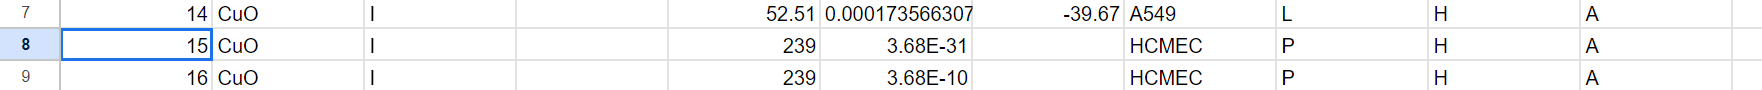

image_2023-06-29_00-40-59.png

## Визуализация данных

In [228]:
# Алгоритм
# строим график (с описанием, легендой и темой крутой)
# делаем аналитическое описание того, что видим
# сохраняем график

## Разведочный анализ данных (опционально)

### Кластеризация

In [229]:
# тут можем скластеризовать как-то семплы, с помощью PCA, DBscan
# можно попробовать импортировать трансформер, преобразовать текстовые признаки в вестора и тоже откластеризовать
# можно как-то попробовать чат джпт прикрутить, но это уже из области 'ищу то, не знаю, что'


# global ordinal_encoder
# j = df.groupby('Surface_Charge').min()['Material'].reset_index().to_numpy().tolist()
# j
# ordinal_encoder = OrdinalEncoder(encoded_missing_value=np.nan)
# ordinal_encoder.fit(df[['Surface_Charge', 'Material']])
# df.groupby('Surface_Charge').min()['Material']
# # print('1   ', ordinal_encoder.categories_)
# le_name_mapping = list(zip([['Negative', 'Au'], ['Neutral', 'IronOxide'], ['Positive', 'Au']], ordinal_encoder.transform([['Negative', 'Au'], ['Neutral', 'IronOxide'], ['Positive', 'Au']])))
# print(le_name_mapping)

[(['Negative', 'Au'], array([0., 0.])), (['Neutral', 'IronOxide'], array([1., 5.])), (['Positive', 'Au'], array([2., 0.]))]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


## описание признаков сегенерированное с помощью ChatGPT 4.0


Описание:
1.   Material type, nanoparticle - химическая формула: Химическая формула наноматериала может влиять на его токсичность в зависимости от взаимодействия с клетками и биологическими процессами.

2.  Elements - некислородный элемент входящий в состав: Различные некислородные элементы могут иметь различные токсичные свойства и взаимодействовать с клетками по-разному.

3.  Electronegativity - электроотрицательность по Полингу: Высокая электроотрицательность наноматериала может способствовать его токсичности путем возможного образования реактивных кислородных и азотистых видов, которые могут повредить клетки.

4.  Ionic radius - ионный радиус элемента: Ионный радиус элемента может влиять на его способность вступать во взаимодействие с клетками и внедряться в них, что может повлиять на токсичность наноматериала.

5. Core size - размер кристаллита: Размер кристаллита наноматериала может влиять на его поверхностную активность и способность взаимодействовать с клетками, что может влиять на его токсичность.

6. Hydro size, diameter - гидродинамический диаметр частиц: Гидродинамический диаметр частиц определяет их поведение в растворе и способность проникать в клетки, что может влиять на их токсичность.

7. Surface charge, zeta potential - дзета-потенциал или заряд поверхности: Заряд поверхности наноматериала может влиять на его взаимодействие с клетками, а также на его устойчивость в растворе, что может отразиться на токсичности.

8. Surface area - площадь поверхности материала: Большая площадь поверхности может увеличить взаимодействие наноматериала с клетками и повысить его токсичность.

9. Cell type, cells: Тип клеток может влиять на токсичность наноматериала, поскольку различные типы клеток могут иметь разную чувствительность к разным веществам. Некоторые клеточные линии могут быть более чувствительными к наноматериалам, чем другие, и могут проявлять более выраженные токсические эффекты.

10. Exposure dose, concentration, dose: Финальная концентрация наноматериала в растворе с клетками может оказывать влияние на его токсичность. Высокие концентрации наноматериала могут привести к усилению токсических эффектов, в то время как более низкие концентрации могут оказывать менее выраженное воздействие.

11. Number of atoms: Количество атомов в наноматериале может влиять на его токсичность. Более крупные наночастицы с большим количеством атомов могут иметь более выраженные токсические свойства, поскольку большее количество вещества может взаимодействовать с клетками.

12. Molecular weight: Молекулярный вес наноматериала может влиять на его токсичность. Более тяжелые наноматериалы могут иметь более выраженные токсические свойства, поскольку они могут быть более сложными для обработки клетками и могут вызывать более сильные воздействия на биологические процессы.

13. Topological polar surface area: Топологическая полярная площадь поверхности наноматериала может влиять на его токсичность. Большая полярная поверхность может увеличить взаимодействие наноматериала с биологическими молекулами и клетками, что может привести к более выраженным токсическим эффектам.

14. a, b, c, alpha, beta, gamma: Параметры кристаллической решетки наноматериала могут влиять на его токсичность. Кристаллическая структура может определять взаимодействие наноматериала с клетками и биологическими процессами, что в свою очередь может влиять на его токсические свойства.

15. Density: Плотность наноматериала может влиять на его токсичность. Более плотные материалы могут обладать более высокой степенью взаимодействия с клетками и биологическими структурами, что может привести к более выраженным токсическим эффектам.

16. Viability: Выживаемость клеток может быть важным показателем токсичности наноматериала. Снижение выживаемости клеток после воздействия наноматериала может указывать на его токсическое действие и потенциальную вредность для живых систем.

17. Type: Тип наноматериала (органический или неорганический) может оказывать влияние на его токсичность. Различные типы материалов могут иметь разные химические свойства и способность взаимодействовать с клетками, что может влиять на степень их токсичности.

18. Coat: Поверхностная модификация наноматериала может влиять на его токсичность. Различные покрытия или модификации поверхности могут изменить взаимодействие наноматериала с клетками и биологическими системами, что может привести к изменению его токсических свойств.

19. Cell line / primary cells: Тип клеточной линии или использование первичных клеток может влиять на токсичность наноматериала. Разные типы клеток могут иметь разную чувствительность к наноматериалам и проявлять разные реакции на их воздействие.

20. Human / animal: Человеческие и животные клетки могут отличаться по своей чувствительности к наноматериалам. Таким образом, токсичность наноматериала может различаться в зависимости от типа клеток, используемых для исследования.

21. Animal: Использование животных в экспериментах может предоставить информацию о токсичности наноматериала для целого организма. Реакции и побочные эффекты в животных могут помочь в оценке общей токсичности наноматериала.

22. Cell morphology: Тип ткани клеток может влиять на их чувствительность к наноматериалам. Различные типы тканей могут иметь разную реакцию на воздействие наноматериалов и проявлять разные токсические эффекты.

23. Cell age: Эмбриональные и зрелые клетки могут отличаться по своей чувствительности к наноматериалам. Таким образом, возраст клеток может влиять на токсичность наноматериала и его способность взаимодействовать с клетками.

24. Cell organ / tissue: Орган или ткань, откуда получены клетки, может влиять на их реакцию на наноматериалы. Разные органы и ткани могут иметь разную чувствительность к наноматериалам и различные механизмы ответа на их воздействие.

25. Exposure time, time: Время инкубации наноматериала с клетками может влиять на его токсичность. Длительное воздействие наноматериала на клетки может привести к накоплению токсических эффектов или активации различных механизмов ответа на стресс.

26. Test: Тип теста, используемого для оценки токсичности наноматериала, может влиять на полученные результаты. Различные тесты могут обнаруживать разные аспекты токсичности и давать разные оценки безопасности наноматериала.

27. Test indicator: Используемые реагенты и индикаторы в тесте могут влиять на его результаты и оценку токсичности наноматериала. Некоторые реагенты могут взаимодействовать с наноматериалом или изменять его свойства, что может влиять на токсические эффекты.

28. Biochemical metrics: Выбор используемых биохимических метрик для оценки токсичности наноматериала может влиять на полученные результаты. Разные метрики могут обнаруживать различные аспекты токсических эффектов и давать разные оценки воздействия на клетки.

29. Interference test: Проверка на вмешательство других реагентов может быть важным шагом для исключения ложноположительных результатов и оценки истинной токсичности наноматериала. Наличие внешних воздействий, которые могут исказить результаты теста, может помочь в правильной интерпретации токсического потенциала материала.

30. Colloidal stability: Стабильность коллоидного состояния наночастиц в растворе может влиять на их токсичность. Нестабильные коллоидные системы могут приводить к агрегации и осаждению наноматериала, что может изменять его токсические свойства и распределение в организме.

31. Positive control: Наличие положительного контроля в тесте может помочь оценить нормальный рост и функцию клеток, что позволяет сравнить его с эффектами наноматериала. Положительный контроль может служить эталоном для определения токсичности наноматериала и интерпретации его воздействия на клетки.
